# Introduction

# Importing data

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style("darkgrid")

import pandas as pd
from datetime import datetime,timedelta


os.chdir('../Python')
from eda_functions import *
#from eda_func_3 import *
from utilities import *

os.chdir('../Animated_EDA_plots')
from eda_func_3 import *
os.chdir('..')

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [3]:
data = load("Generated Data/atp_data")
#data = load("../Generated Data/atp_data")

beg_year = 2011
dat = data[(data.Date.dt.year >= beg_year)]
dat.dropna(inplace = True)

dat['elo_diff'] = dat.elo_winner - dat.elo_loser
dat['rank_diff'] = dat.LRank - dat.WRank
dat['smaller_ps'] = dat[['PSL','PSW']].min(axis=1)
dat['smaller_b365'] = dat[['B365W','B365L']].min(axis=1)

/opt/anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __nam

# Checking the better

In [27]:
x = np.linspace(0, 600, 60) # elo-scores
y = np.linspace(0, 120, 40) # ATP-ranking


X, Y = np.meshgrid(x, y)

In [28]:
Y.shape
Z = np.zeros(X.shape)
Z1 = np.zeros(X.shape)

rnd = None

for i,elo in enumerate(x):
    for j, rank in enumerate(y):
        tmp = gain_better(dat, 
                            elo_diff = elo, 
                            rank_diff = rank, 
                            threshold = None, 
                            tax = 0.0, 
                            round_ = rnd,
                            limit = 2000, 
                            verbose=0)
           
        Z[j,i] = tmp[1]
        Z1[j,i] = tmp[0]

/Users/mareknowaczewski/nf-may20/cap_new_2/capstone/Python/eda_func_2.py:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  won['B365W_taxed'] = won.B365W*(1-tax)


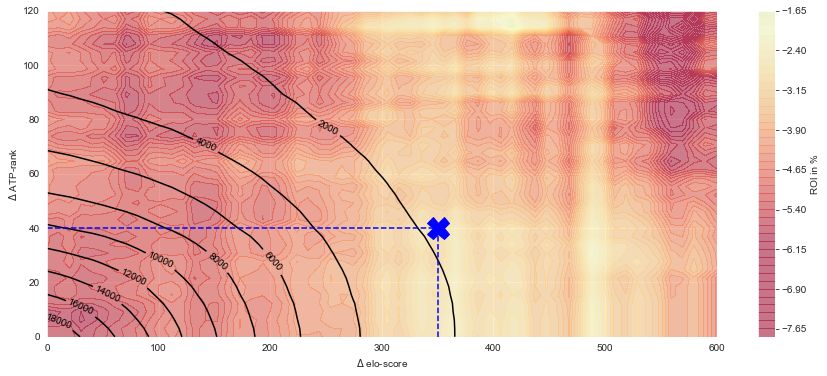

In [29]:
fig, ax = plt.subplots(figsize = (15,6))
CS = ax.contour(X, Y, Z1, 10, colors='black')

class nf(float):
    def __repr__(self):
        s = f'{self:.1f}'
        return f'{self:.0f}' if s[-1] == '0' else s
    
# Recast levels to new class
CS.levels = [nf(val) for val in CS.levels]

'''
# Label levels with specially formatted floats
if plt.rcParams["text.usetex"]:
    fmt = r'%r \%%'
else:
    fmt = '%r %%'
'''    
fmt = '%r'
ax.clabel(CS, CS.levels, inline=True, fmt=fmt, fontsize=10)
#ax.clabel(CS, CS.levels, inline=True, fontsize=10)


CS3 = ax.contourf(X, Y, Z, 50, cmap='RdYlGn', alpha=0.5)
cb = fig.colorbar(CS3)
cb.set_label('ROI in %')
CS3.set_clim(-6,2)

ax.set_xlabel('$\Delta$ elo-score');
ax.set_ylabel('$\Delta$ ATP-rank');

checking_elo = 350
checking_rank = 40

plt.plot(checking_elo, checking_rank, 'bX',markersize=22)
plt.plot([checking_elo, checking_elo],[0,checking_rank],'b--')
plt.plot([0, checking_elo],[checking_rank,checking_rank],'b--')

Investment:         1764     (Number of matches)
Amount of return:   1716.18
Gain:               -47.82
Percentage of ROI:  97.29 %
Performance of ROI: -2.71 %


/Users/mareknowaczewski/nf-may20/cap_new_2/capstone/Python/eda_func_2.py:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  won['B365W_taxed'] = won.B365W*(1-tax)
/Users/mareknowaczewski/nf-may20/cap_new_2/capstone/Python/eda_func_2.py:118: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  won['gain'] = won.B365W_taxed - 1
/Users/mareknowaczewski/nf-may20/cap_new_2/capstone/Python/eda_func_2.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


Investment:         726     (Number of matches)
Amount of return:   701.29
Gain:               -24.71
Percentage of ROI:  96.6 %
Performance of ROI: -3.4 %


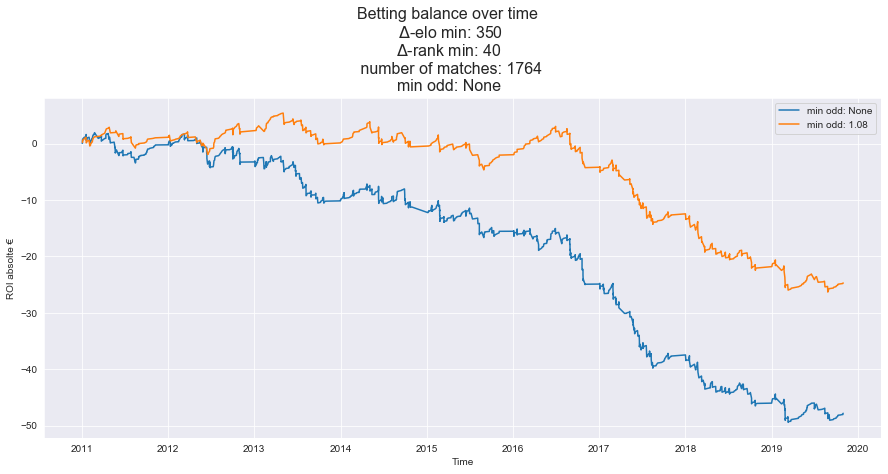

In [30]:
#rnd = 0
thr = None
thr2 = 1.08
gain_data = gain_better(dat, 
                    elo_diff = checking_elo, 
                    rank_diff = checking_rank, 
                    threshold = thr, 
                    tax = 0.0, 
                    limit = 2000, 
                    round_=rnd,
                    verbose=1,
                    data_back=1,
                    rst_idx = 1)
gain_data2 = gain_better(dat, 
                    elo_diff = checking_elo, 
                    rank_diff = checking_rank, 
                    threshold = thr2, 
                    tax = 0.0, 
                    limit = 2000, 
                    round_=rnd,
                    verbose=1,
                    data_back=1,
                    rst_idx = 1)

fig, ax = plt.subplots(figsize = (15,7))
ax.plot(gain_data.Date,gain_data.rolling_gain, label =f'min odd: {thr}')
ax.plot(gain_data2.Date,gain_data2.rolling_gain, label =f'min odd: {thr2}')
ax.set_ylabel('ROI absolte €')
ax.set_xlabel('Time')
title = f'Betting balance over time \n $\Delta$-elo min: {checking_elo} \n' \
        f'$\Delta$-rank min: {checking_rank} \n number of matches: {gain_data.shape[0]}\n'\
        f'min odd: {thr}'
fig.suptitle(title, fontsize = 16)
plt.subplots_adjust(top=0.8)
plt.legend()



# Checking crossover 2

In [31]:
x = np.linspace(0, 450, 60) # elo-scores
y = np.linspace(0, 120, 40) # ATP-ranking

#x = np.linspace(0, 100, 60) # elo-scores
#y = np.linspace(0, 30, 40) # ATP-ranking


X, Y = np.meshgrid(x, y)

In [32]:
Y.shape
Z = np.zeros(X.shape)
Z1 = np.zeros(X.shape)

rnd = None

for i,elo in enumerate(x):
    for j, rank in enumerate(y):
        tmp = gain_crossover2(dat, 
                            elo_diff = elo, 
                            rank_diff = rank, 
                            threshold = None, 
                            tax = 0.0, 
                            round_ = rnd,
                            limit = 2000, 
                            verbose=0)
           
        Z[j,i] = tmp[1]
        Z1[j,i] = tmp[0]

/Users/mareknowaczewski/nf-may20/cap_new_2/capstone/Python/eda_func_2.py:317: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  won['B365W_taxed'] = won.B365W*(1-tax)


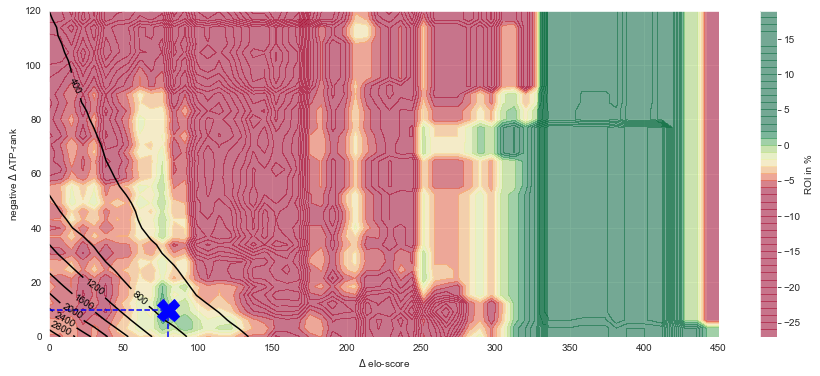

In [33]:
fig, ax = plt.subplots(figsize = (15,6))
CS = ax.contour(X, Y, Z1, 10, colors='black')

class nf(float):
    def __repr__(self):
        s = f'{self:.1f}'
        return f'{self:.0f}' if s[-1] == '0' else s
    
# Recast levels to new class
CS.levels = [nf(val) for val in CS.levels]

'''
# Label levels with specially formatted floats
if plt.rcParams["text.usetex"]:
    fmt = r'%r \%%'
else:
    fmt = '%r %%'
'''    
fmt = '%r'
ax.clabel(CS, CS.levels, inline=True, fmt=fmt, fontsize=10)
#ax.clabel(CS, CS.levels, inline=True, fontsize=10)


CS3 = ax.contourf(X, Y, Z, 50, cmap='RdYlGn', alpha=0.5)
cb = fig.colorbar(CS3)
cb.set_label('ROI in %')
CS3.set_clim(-6,2)

ax.set_xlabel('$\Delta$ elo-score');
ax.set_ylabel('negative $\Delta$ ATP-rank');

checking_elo = 80
checking_rank = 10

plt.plot(checking_elo, checking_rank, 'bX',markersize=22)
plt.plot([checking_elo, checking_elo],[0,checking_rank],'b--')
plt.plot([0, checking_elo],[checking_rank,checking_rank],'b--')

Investment:         654     (Number of matches)
Amount of return:   676.98
Gain:               22.98
Percentage of ROI:  103.51 %
Performance of ROI: 3.51 %


/Users/mareknowaczewski/nf-may20/cap_new_2/capstone/Python/eda_func_2.py:317: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  won['B365W_taxed'] = won.B365W*(1-tax)
/Users/mareknowaczewski/nf-may20/cap_new_2/capstone/Python/eda_func_2.py:345: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  won['gain'] = won.B365W_taxed - 1
/Users/mareknowaczewski/nf-may20/cap_new_2/capstone/Python/eda_func_2.py:346: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Investment:         654     (Number of matches)
Amount of return:   643.13
Gain:               -10.87
Percentage of ROI:  98.34 %
Performance of ROI: -1.66 %


Text(0, 0.5, 'absolute gain')

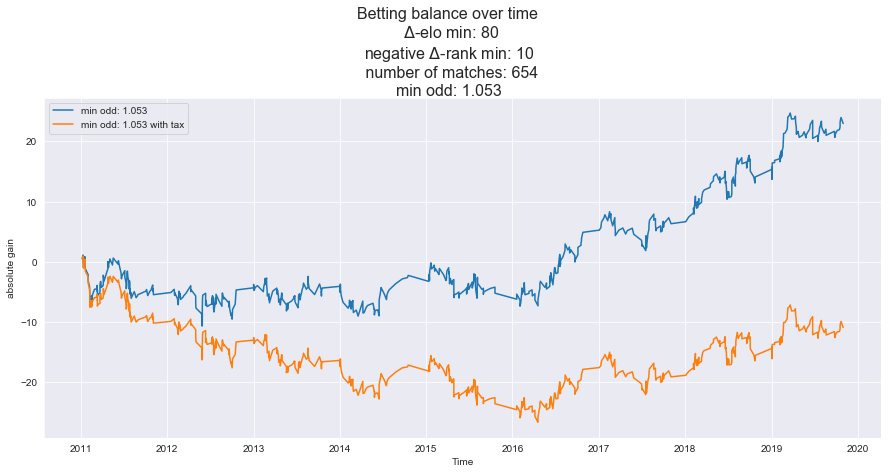

In [22]:
#rnd = 0
tax = 0.05
thr = round(1/(1-tax),3)
#thr = None
#thr2 = 1.08

gain_data = gain_crossover2(dat, 
                    elo_diff = checking_elo, 
                    rank_diff = checking_rank, 
                    threshold = thr, 
                    tax = 0.0, 
                    limit = 2000, 
                    round_=rnd,
                    verbose=1,
                    data_back=1,
                    rst_idx = 1)
gain_data2 = gain_crossover2(dat, 
                    elo_diff = checking_elo, 
                    rank_diff = checking_rank, 
                    threshold = None, 
                    tax = 0.05, 
                    limit = 2000, 
                    round_=rnd,
                    verbose=1,
                    data_back=1,
                    rst_idx = 1)

fig, ax = plt.subplots(figsize = (15,7))
ax.plot(gain_data.Date,gain_data.rolling_gain, label =f'min odd: {thr}')
ax.plot(gain_data2.Date,gain_data2.rolling_gain, label =f'min odd: {thr} with tax')
title = f'Betting balance over time \n $\Delta$-elo min: {checking_elo} \n' \
        f'negative $\Delta$-rank min: {checking_rank} \n number of matches: {gain_data.shape[0]}\n'\
        f'min odd: {thr}'
fig.suptitle(title, fontsize = 16)
plt.subplots_adjust(top=0.8)
plt.legend()
ax.set_xlabel('Time')
ax.set_ylabel('absolute gain')

# Checking crossover 1

In [5]:

x = np.linspace(0, 300, 60) # elo-scores
y = np.linspace(0, 120, 24) # ATP-ranking


X, Y = np.meshgrid(x, y)

In [6]:
Y.shape
Z = np.zeros(X.shape)
Z1 = np.zeros(X.shape)


for i,elo in enumerate(x):
    for j, rank in enumerate(y):
        tmp = gain_crossover(dat, 
                            elo_diff = elo, 
                            rank_diff = rank, 
                            threshold = None, 
                            tax = 0.0, 
                            limit = 2000, 
                            verbose=0)
           
        Z[j,i] = tmp[1]
        Z1[j,i] = tmp[0]


/Users/mareknowaczewski/nf-may20/cap_new_2/capstone/Animated_EDA_plots/eda_func_3.py:210: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  won['B365W_taxed'] = won.B365W*(1-tax)


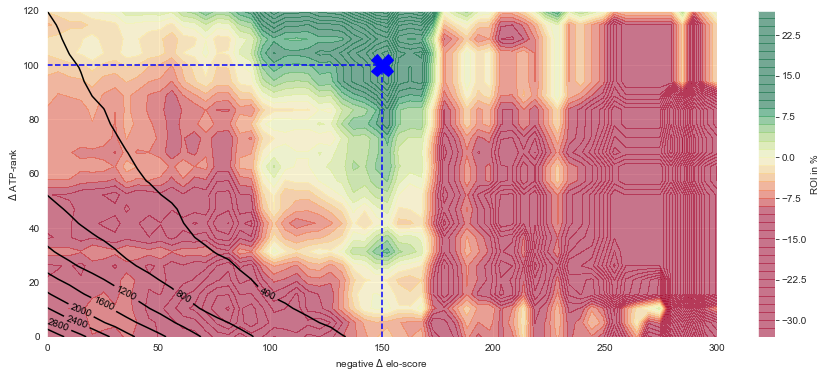

In [7]:
fig, ax = plt.subplots(figsize = (15,6))
CS = ax.contour(X, Y, Z1, 10, colors='black')

class nf(float):
    def __repr__(self):
        s = f'{self:.1f}'
        return f'{self:.0f}' if s[-1] == '0' else s
    
# Recast levels to new class
CS.levels = [nf(val) for val in CS.levels]

'''
# Label levels with specially formatted floats
if plt.rcParams["text.usetex"]:
    fmt = r'%r \%%'
else:
    fmt = '%r %%'
'''    
fmt = '%r'
ax.clabel(CS, CS.levels, inline=True, fmt=fmt, fontsize=10)
#ax.clabel(CS, CS.levels, inline=True, fontsize=10)


CS3 = ax.contourf(X, Y, Z, 50, cmap='RdYlGn', alpha=0.5)
cb = fig.colorbar(CS3)
cb.set_label('ROI in %')
CS3.set_clim(-10,10)

ax.set_xlabel('negative $\Delta$ elo-score');
ax.set_ylabel('$\Delta$ ATP-rank');

checking_elo = 150
checking_rank = 100

plt.plot(checking_elo, checking_rank, 'bX',markersize=22)
plt.plot([checking_elo, checking_elo],[0,checking_rank],'b--')
plt.plot([0, checking_elo],[checking_rank,checking_rank],'b--')

Investment:         89     (Number of matches)
Amount of return:   105.75
Gain:               16.75
Percentage of ROI:  118.82 %
Performance of ROI: 18.82 %


/Users/mareknowaczewski/nf-may20/cap_new_2/capstone/Animated_EDA_plots/eda_func_3.py:210: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  won['B365W_taxed'] = won.B365W*(1-tax)
/Users/mareknowaczewski/nf-may20/cap_new_2/capstone/Animated_EDA_plots/eda_func_3.py:244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  won['gain'] = won.B365W_taxed - 1
/Users/mareknowaczewski/nf-may20/cap_new_2/capstone/Animated_EDA_plots/eda_func_3.py:245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

Text(0, 0.5, 'absolute gain')

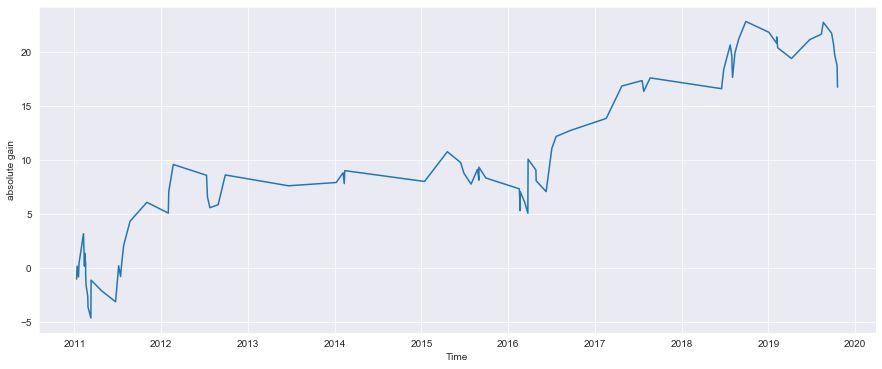

In [9]:
gain_data = gain_crossover(dat, 
                    elo_diff = checking_elo, 
                    rank_diff = checking_rank, 
                    threshold = 1.08, 
                    tax = 0.0, 
                    limit = 2000, 
                    verbose=1,
                    data_back=1,
                    rst_idx = 1)

fig, ax = plt.subplots(figsize = (15,6))
ax.plot(gain_data.Date,gain_data.rolling_gain)

ax.set_xlabel('Time')
ax.set_ylabel('absolute gain')
#plt.plot(dat_21.rolling_gain)

# comparison with kaggle data

In [10]:
data_kag = pd.read_csv('../Generated Data/atp_data_from_kaggle.csv')
data_kag.Date = data_kag.Date.apply(lambda x:datetime.strptime(x, '%Y-%m-%d'))

In [17]:
datk = data_kag[(data_kag.Date.dt.year >= beg_year)]
datk.dropna(inplace = True)

datk['elo_diff'] = datk.elo_winner - datk.elo_loser
datk['rank_diff'] = datk.LRank - datk.WRank
datk['smaller_ps'] = datk[['PSL','PSW']].min(axis=1)
datk['smaller_b365'] = datk[['B365W','B365L']].min(axis=1)

/opt/anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/opt/anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html

In [24]:
Y.shape
Zk = np.zeros(X.shape)
Z1k = np.zeros(X.shape)


for i,elo in enumerate(x):
    for j, rank in enumerate(y):
        tmp = gain_better(datk, 
                            elo_diff = elo, 
                            rank_diff = rank, 
                            threshold = None, 
                            tax = 0.0, 
                            limit = 2000, 
                            verbose=0)
           
        Zk[j,i] = tmp[1]
        Z1k[j,i] = tmp[0]

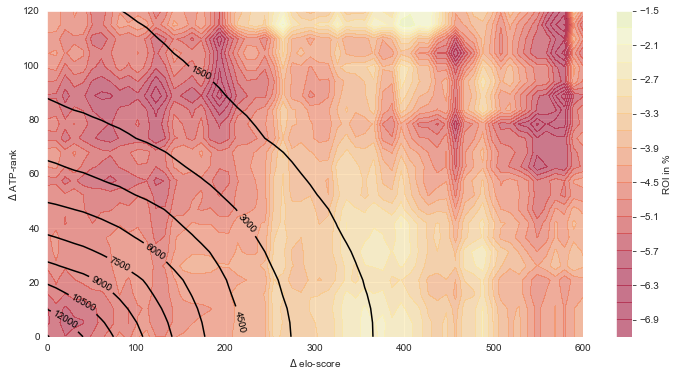

In [25]:
fig, ax = plt.subplots(figsize = (12,6))
CS = ax.contour(X, Y, Z1k, 10, colors='black')

class nf(float):
    def __repr__(self):
        s = f'{self:.1f}'
        return f'{self:.0f}' if s[-1] == '0' else s
    
# Recast levels to new class
CS.levels = [nf(val) for val in CS.levels]

'''
# Label levels with specially formatted floats
if plt.rcParams["text.usetex"]:
    fmt = r'%r \%%'
else:
    fmt = '%r %%'
'''    
fmt = '%r'
ax.clabel(CS, CS.levels, inline=True, fmt=fmt, fontsize=10)
#ax.clabel(CS, CS.levels, inline=True, fontsize=10)


CS3 = ax.contourf(X, Y, Zk, 20, cmap='RdYlGn', alpha=0.5)
cb = fig.colorbar(CS3)
cb.set_label('ROI in %')
CS3.set_clim(-6,2)

ax.set_xlabel('$\Delta$ elo-score');
ax.set_ylabel('$\Delta$ ATP-rank');

In [2]:
whos

Variable                         Type                          Data/Info
------------------------------------------------------------------------
NamespaceMagics                  MetaHasTraits                 <class 'IPython.core.magi<...>mespace.NamespaceMagics'>
datetime                         type                          <class 'datetime.datetime'>
dump                             function                      <function dump at 0x7ffe8a9558c8>
gain_better                      function                      <function gain_better at 0x7ffe8a955840>
gain_crossover                   function                      <function gain_crossover at 0x7ffe8a9559d8>
gain_crossover2                  function                      <function gain_crossover2 at 0x7ffe8a955a60>
gain_perc_b365                   function                      <function gain_perc_b365 at 0x7ffe8a9557b8>
get_ipython                      function                      <function get_ipython at 0x7ffe84ad6488>
getsizeof        